In [3]:
#loading virtual python env
!source ./bin/activate


In [4]:
import pandas as pd
from sklearn.impute import SimpleImputer # fixing miss val
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

ModuleNotFoundError: No module named 'pandas'

In [3]:
url="https://delvex-software-center.s3.ap-south-1.amazonaws.com/USGS/all_month.csv"
data_uri="s3://delvex-software-center/USGS/all_month.csv"

In [4]:
data=pd.read_csv(url)
data1=data.iloc[:,1:5]
#df=pd.read_csv(data_uri)

In [5]:
#print(data1)
# Count missing values per column
data1.info()
missing_values = data1.isna().sum()

print(missing_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9593 entries, 0 to 9592
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   9593 non-null   float64
 1   longitude  9593 non-null   float64
 2   depth      9593 non-null   float64
 3   mag        9592 non-null   float64
dtypes: float64(4)
memory usage: 299.9 KB
latitude     0
longitude    0
depth        0
mag          1
dtype: int64


In [6]:
#chosing features
features=["latitude","longitude","depth"]
label="mag"
data1=data1.dropna(subset=label)
input=data1.iloc[:,0:3].values
#features=["latitude","longitude","depth"]


In [7]:
# doing in features 
for col in features:
    data1[col] = data1[col].fillna(data1[col].median())

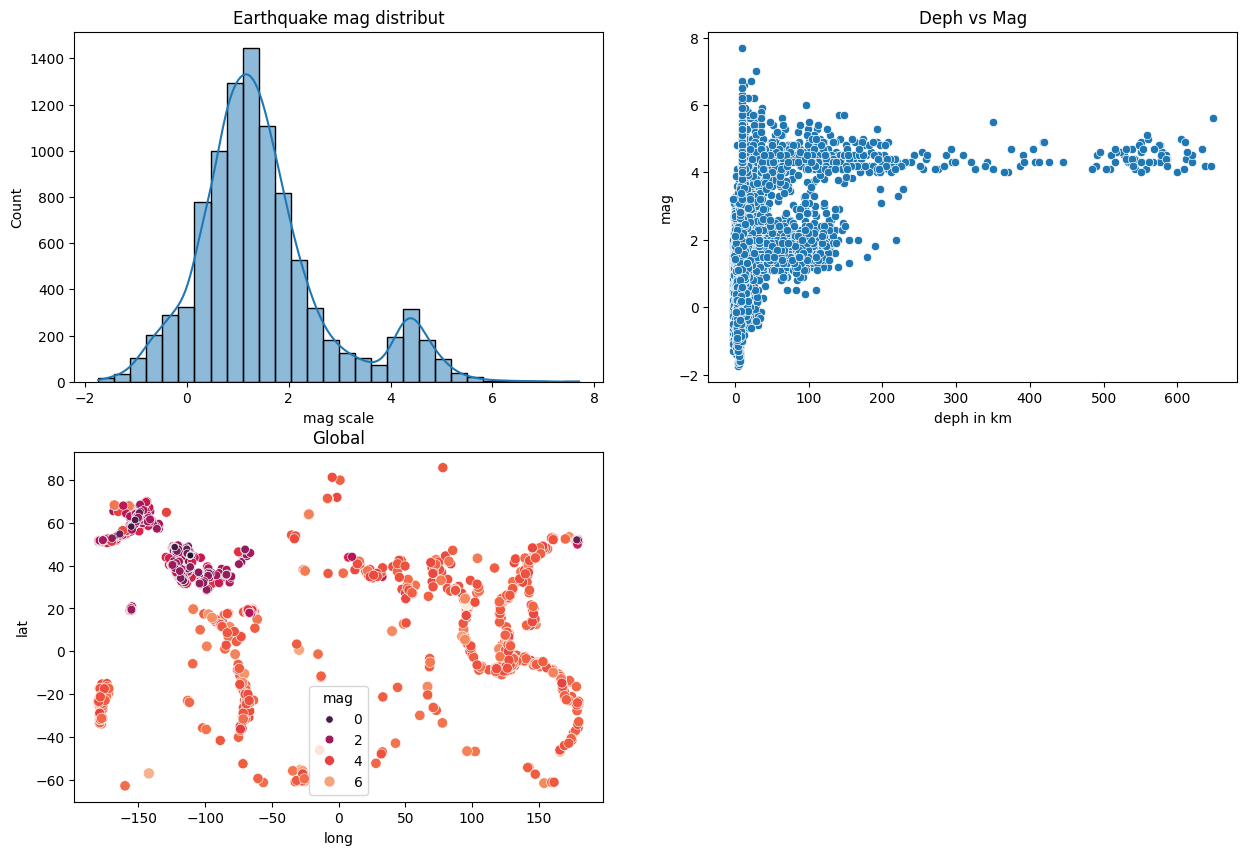

In [8]:
# some basic visuals
plt.figure(figsize=(15,10))
#first plot
plt.subplot(2,2,1)
plt.title("Earthquake mag distribut")
plt.xlabel("mag scale")
sb.histplot(data1[label],kde=True,bins=30)


# second plot
plt.subplot(2,2,2)
plt.title("Deph vs Mag")
plt.xlabel("deph in km")
sb.scatterplot(x="depth", y=label, data=data1)

#Global locations
plt.subplot(2,2,3)
plt.title("Global")
plt.xlabel("long")
plt.ylabel("lat")
sb.scatterplot(x="longitude", y="latitude",size=label,data=data1,hue='mag', palette='rocket')
plt.show()

In [9]:
# reconsidering features and labels
feature_data=data1[features]
label_data=data1[label]
feature_data

,latitude,longitude,depth
0,38.840668,-122.834335,1.32
1,61.556800,-141.271600,13.40
2,61.789200,-149.608200,38.70
3,60.081400,-152.528700,97.80
4,35.639833,-117.548500,8.08
...,...,...,...
9588,44.739000,-111.123333,7.15
9589,37.428500,-119.018500,3.69
9590,44.726000,-111.120667,2.38
9591,-57.288500,147.327500,10.00


In [10]:
input

array([[  38.84066772, -122.83433533,    1.32000005],
       [  61.5568    , -141.2716    ,   13.4       ],
       [  61.7892    , -149.6082    ,   38.7       ],
       ...,
       [  44.726     , -111.12066667,    2.38      ],
       [ -57.2885    ,  147.3275    ,   10.        ],
       [  39.3605    , -111.1945    ,   -0.61      ]], shape=(9592, 3))

In [11]:
label=data1.iloc[:,-1].values.reshape(-1, 1)  # Convert to 2D

In [12]:
label

array([[ 0.53],
       [ 1.2 ],
       [ 1.2 ],
       ...,
       [-0.92],
       [ 4.5 ],
       [ 1.44]], shape=(9592, 1))

In [13]:
data

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2025-04-03T03:16:50.230Z,38.840668,-122.834335,1.32,0.53,md,6.0,122.0,0.002262,0.01,...,2025-04-03T03:18:28.928Z,"10 km NNW of The Geysers, CA",earthquake,0.61,1.230,0.310000,9.0,automatic,nc,nc
1,2025-04-03T03:08:03.540Z,61.556800,-141.271600,13.40,1.20,ml,NaN,NaN,NaN,0.20,...,2025-04-03T03:10:11.692Z,"88 km E of McCarthy, Alaska",earthquake,NaN,0.400,NaN,NaN,automatic,ak,ak
2,2025-04-03T02:59:56.724Z,61.789200,-149.608200,38.70,1.20,ml,NaN,NaN,NaN,0.53,...,2025-04-03T03:01:20.110Z,"18 km N of Meadow Lakes, Alaska",earthquake,NaN,1.000,NaN,NaN,automatic,ak,ak
3,2025-04-03T02:54:35.248Z,60.081400,-152.528700,97.80,1.40,ml,NaN,NaN,NaN,0.46,...,2025-04-03T02:57:27.690Z,"46 km WNW of Happy Valley, Alaska",earthquake,NaN,0.500,NaN,NaN,automatic,ak,ak
4,2025-04-03T02:41:42.280Z,35.639833,-117.548500,8.08,0.89,ml,19.0,63.0,0.092800,0.13,...,2025-04-03T02:45:07.322Z,"12 km E of Ridgecrest, CA",earthquake,0.21,0.860,0.161000,16.0,automatic,ci,ci
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9588,2025-03-04T03:25:43.640Z,44.739000,-111.123333,7.15,-0.37,md,7.0,78.0,0.053250,0.11,...,2025-03-04T22:44:36.140Z,"6 km ESE of Hebgen Lake Estates, Montana",earthquake,0.33,1.410,0.371060,4.0,reviewed,uu,uu
9589,2025-03-04T03:24:58.760Z,37.428500,-119.018500,3.69,1.70,md,28.0,91.0,0.071980,0.06,...,2025-03-13T10:22:17.234Z,"23 km SSW of Mammoth Lakes, CA",earthquake,0.27,1.030,0.118000,21.0,reviewed,nc,nc
9590,2025-03-04T03:22:28.320Z,44.726000,-111.120667,2.38,-0.92,md,4.0,143.0,0.070890,0.03,...,2025-03-04T22:44:30.960Z,"7 km N of West Yellowstone, Montana",earthquake,0.29,6.400,0.036038,2.0,reviewed,uu,uu
9591,2025-03-04T03:20:13.493Z,-57.288500,147.327500,10.00,4.50,mb,9.0,171.0,14.395000,0.56,...,2025-03-27T03:48:33.040Z,west of Macquarie Island,earthquake,13.14,1.998,0.151000,13.0,reviewed,us,us


In [14]:

impute=SimpleImputer(missing_values=np.nan,strategy="mean")

In [15]:
impute.fit(label) # calculating the missing values 

,missing_values,nan
,strategy,'mean'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [16]:
label= impute.transform(label).ravel()

In [17]:
label

array([ 0.53,  1.2 ,  1.2 , ..., -0.92,  4.5 ,  1.44], shape=(9592,))

In [18]:
#split
train_ft,test_ft,train_lb,test_lb=train_test_split(feature_data,label_data,test_size=.2,random_state=100)

In [19]:
regr_model=RandomForestRegressor()


In [20]:
trained_model=regr_model.fit(train_ft,train_lb)

In [21]:
#predicting magnitude
print("actual", test_lb)

actual 8646    1.03
995     1.38
553     0.20
4322    2.10
2589    0.58
        ... 
5284    1.50
6501    1.83
6448    1.40
64      0.80
1501    1.12
Name: mag, Length: 1919, dtype: float64


In [22]:
predicted_mag=trained_model.predict(test_ft)

In [23]:
print(predicted_mag)


[0.966  1.5359 0.0174 ... 1.622  1.267  0.9179]


In [30]:
#nmodel evaluation using MSE
error=mean_squared_error(test_lb,predicted_mag)
error2=r2_score(test_lb,predicted_mag)
error3=mean_absolute_error(test_lb,predicted_mag)
print(f"MSE: {error:.4f}, r2: {error2:.4f}, MAE: {error3:.4f}")

MSE: 0.2385, r2: 0.8497, MAE: 0.3570
